In [1]:
!python -m pip uninstall -y changed

Found existing installation: changed 0.0.1
Uninstalling changed-0.0.1:
  Successfully uninstalled changed-0.0.1


In [2]:
!python -m pip install 'git+https://github.com/grosed/changed/#egg=changed&subdirectory=python/package'

  Cloning https://github.com/grosed/changed/ to /tmp/pip-install-dkr5c4wt/changed_c1b9946bc3d6437baf6ef9d0d4a6f443
  Running command git clone --filter=blob:none --quiet https://github.com/grosed/changed/ /tmp/pip-install-dkr5c4wt/changed_c1b9946bc3d6437baf6ef9d0d4a6f443
  Resolved https://github.com/grosed/changed/ to commit e2a7cf83d917410490f0b1c1c91e2835f9134d36
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for changed: filename=changed-0.0.1-py3-none-any.whl size=16720 sha256=075afd191b9e1899e3d563fade29377e31f0464126ad97229226c05f62f9d5aa
  Stored in directory: /tmp/pip-ephem-wheel-cache-fq7xav4p/wheels/54/04/4a/740010f31cceeeeaf64c7bf0e4e8b26eca12edc6aeb6de0faa
Successfully built changed


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm,median_abs_deviation,chi2

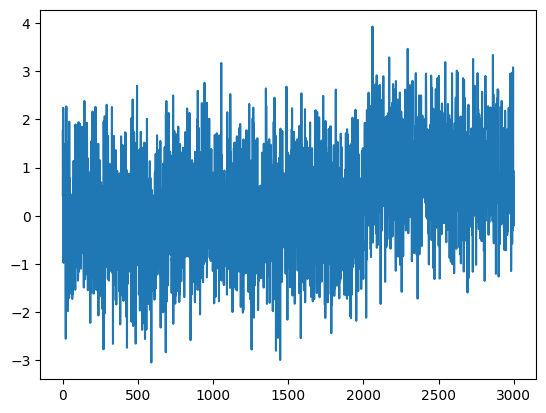

In [4]:
np.random.seed(0)
X = [0.0 for i in range(2000)] + [1.0 for i in range(1000)]
E = norm.rvs(size=len(X))
X = [x+e for x,e in zip(X,E)]
plt.plot(X)
plt.show()

In [5]:
from changed.cost.normal import mean as nm

In [6]:
cf = nm(X)

In [7]:
from changed.core import split

In [8]:
R = list(range(len(X)))
split(cf,cf,R)

(2002, 2819.4281452840214)

In [9]:
from changed.methods import amoc
from math import log

In [10]:
beta = 2*log(len(X))
amoc(cf,R,beta)

(2002, 2835.4408804193217)

In [11]:
from changed.methods.sequential import sop,sop_state

In [12]:
S = sop_state()
S = sop(S,cf,R,beta)

In [13]:
S.s(2999)

(2002, 2831.7864072636194)

In [14]:
S = sop_state()
for r in R :
    S = sop(S,cf,[r],beta)

In [15]:
S.s(2999)

(2002, 2831.7864072636194)

In [16]:
from changed.methods import op

In [17]:
res = op(cf,R,beta)

In [18]:
res(2999)

(2002, 2831.7864072636194)